In [2]:
# Create col that is a prediction percentage
# Create col of binary prediction
# Compare to outcome with confusion matrix

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Diabetes = pd.read_csv('diabetes.csv')
D = Diabetes
Diabetes['BMI'].mean()

31.992578124999998

In [ ]:
Diabetes.head() 

# Impute data for predictive models?
# # Replace 0 values with the median of the respective columns 
Diabetes['BMI'] = Diabetes['BMI'].replace(0, Diabetes['BMI'].median())
Diabetes['Insulin'] = Diabetes['Insulin'].replace(0, Diabetes['Insulin'].median())
Diabetes['BloodPressure'] = Diabetes['BloodPressure'].replace(0, Diabetes['BloodPressure'].median())
Diabetes['SkinThickness'] = Diabetes['SkinThickness'].replace(0, Diabetes['SkinThickness'].median())
Diabetes['Glucose'] = Diabetes['Glucose'].replace(0, Diabetes['Glucose'].median())

0


In [5]:
Diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


<Axes: >

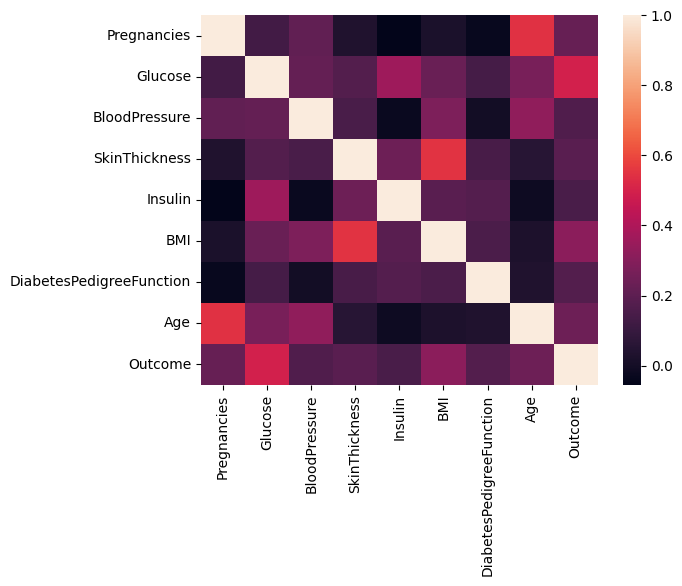

In [6]:
df =  pd.DataFrame(data=Diabetes)
# pd.plotting.scatter_matrix(df.drop('Outcome', inplace=False, axis=1))
sns.heatmap(Diabetes.corr())


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Develop train and test data and preprocess missing data. Pregnancies expects 0 values sometimes.
X = Diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = Diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.2)

X_train_Pregnancies = X_train[:, 0].reshape(-1, 1)
X_test_Pregnancies = X_test[:, 0].reshape(-1, 1)

imputer = SimpleImputer(missing_values=0, strategy='median')
X_train_imputed = imputer.fit_transform(X_train[:, 1:])
X_test_imputed = imputer.transform(X_test[:, 1:])
# X_train2 = pd.DataFrame(X_test)

X_train = np.concatenate([X_train_Pregnancies, X_train_imputed], axis=1)
X_test = np.concatenate([X_test_Pregnancies, X_test_imputed], axis=1)
X_train2 = pd.DataFrame(X_train)

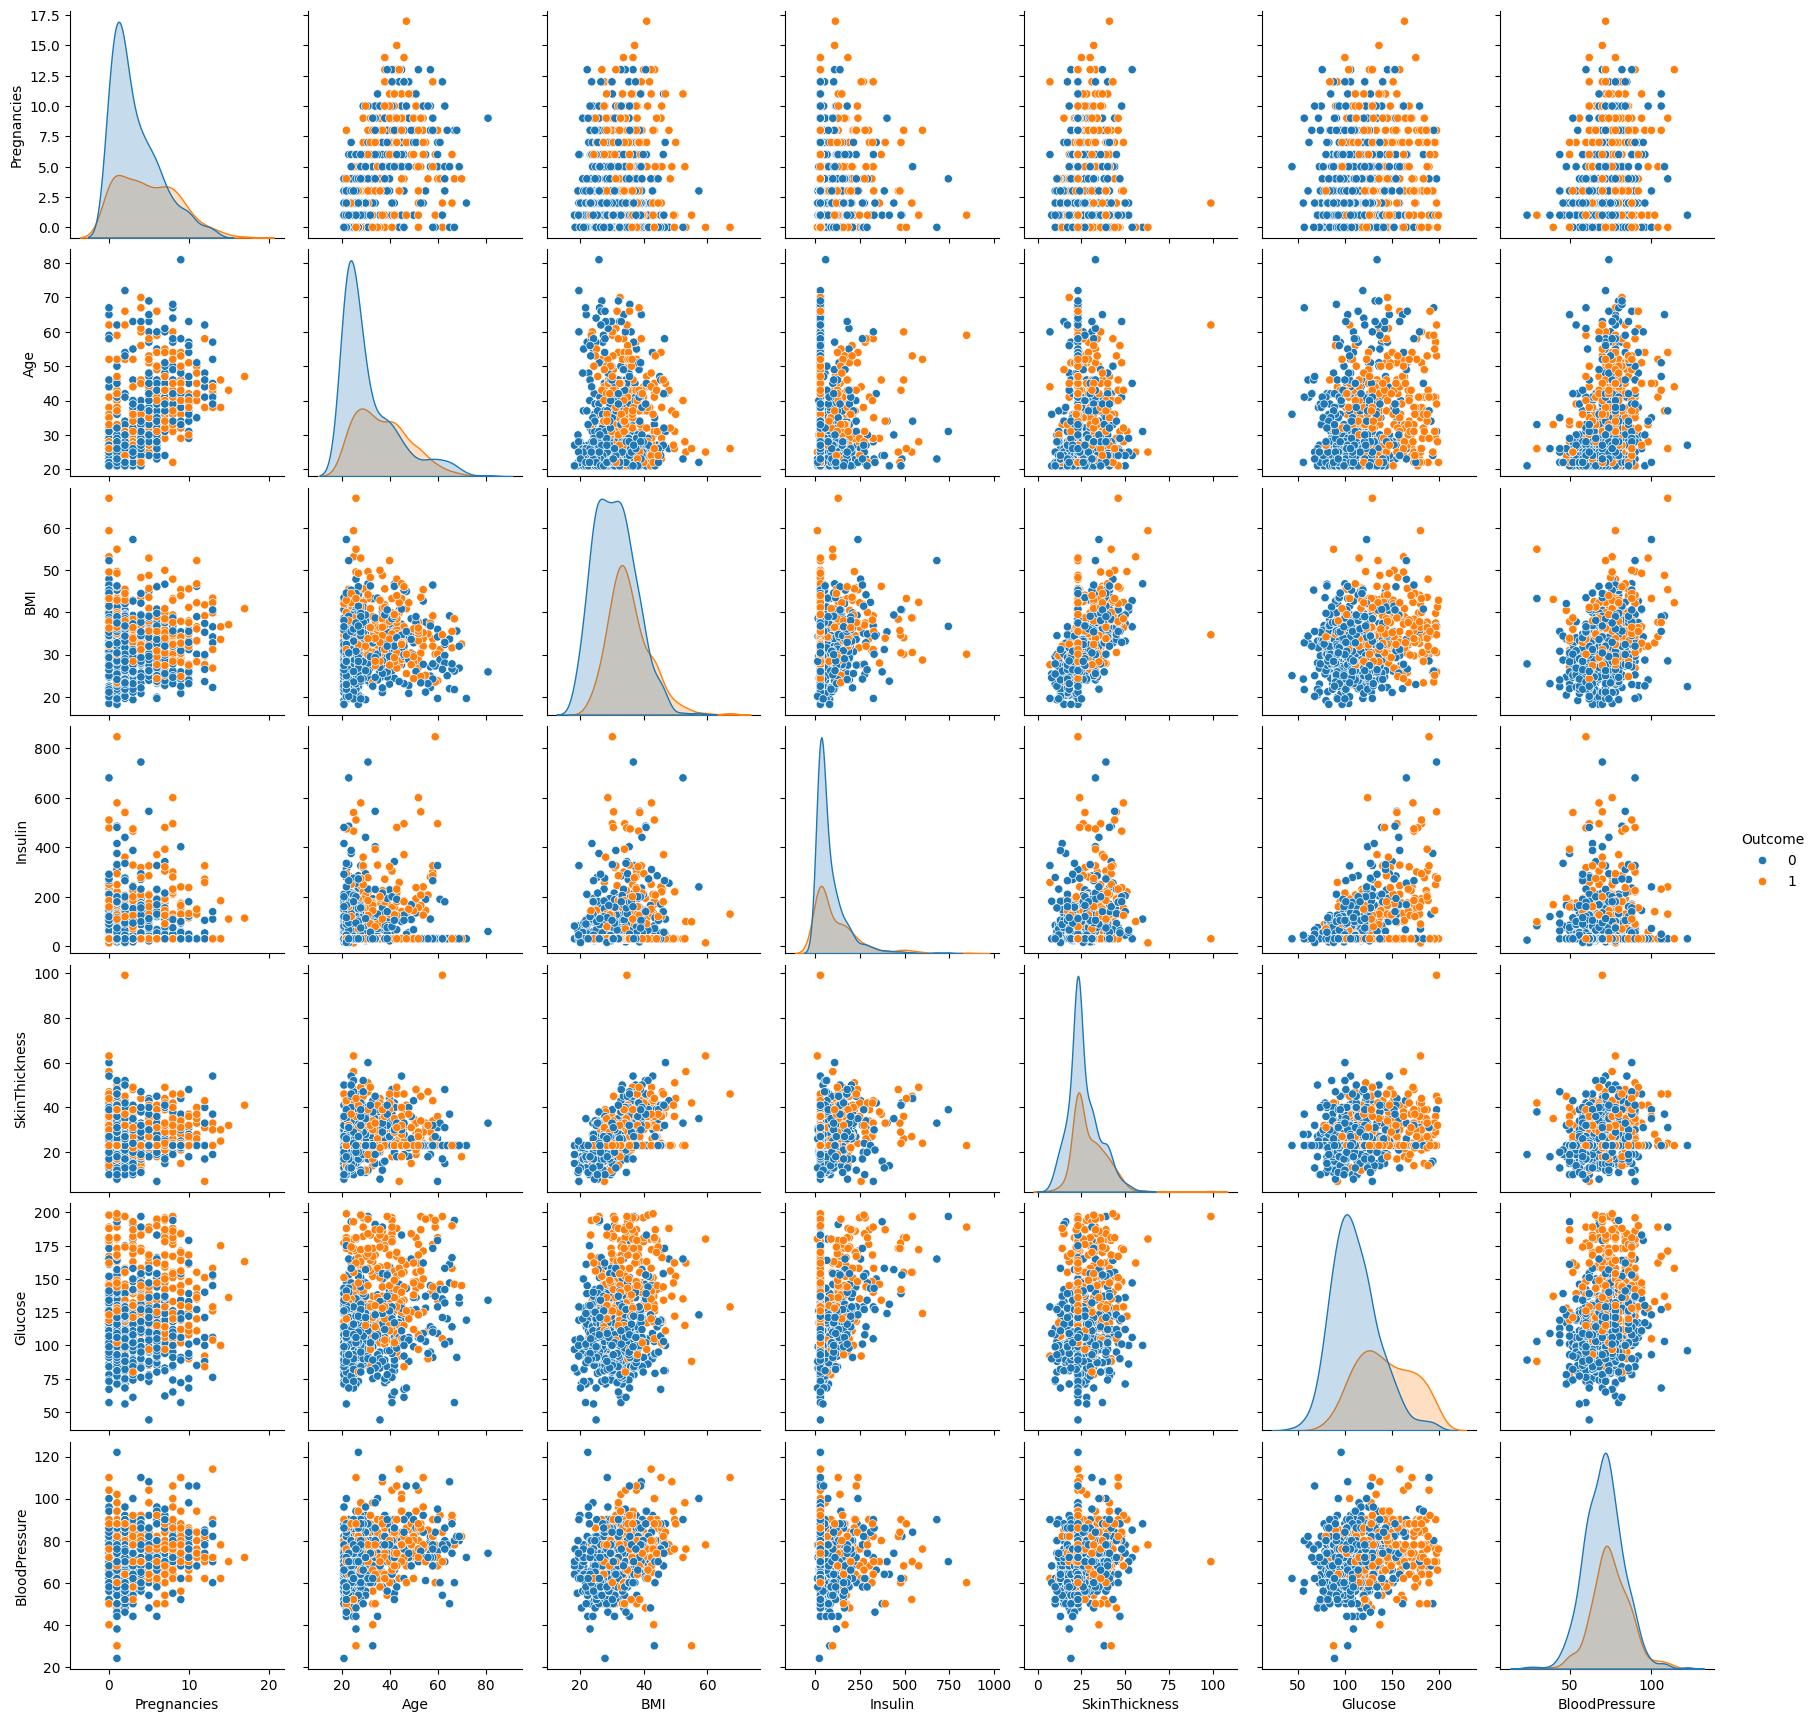

In [8]:
data = Diabetes[['Pregnancies', 'Age', 'BMI', 'Insulin', 'SkinThickness', 'Glucose', 'BloodPressure', 'Outcome']]
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.show()

# How can we assess each entry and categorize them by risk groups (LO, MED, HI) based on health indicators?

In [9]:
means = {
    'Glucose': np.mean(Diabetes.Glucose),
    'BloodPressure': np.mean(Diabetes.BloodPressure),
    'SkinThickness': np.mean(Diabetes.SkinThickness),
    'Insulin': np.mean(Diabetes.Insulin),
    'BMI': np.mean(Diabetes.BMI),
    'DiabetesPedigreeFunction': np.mean(Diabetes.DiabetesPedigreeFunction),
    'Age': np.mean(Diabetes.Age),
    'Pregnancies': np.mean(Diabetes.Pregnancies)
    } 

medians = {
    'Glucose': np.median(Diabetes.Glucose),
    'BloodPressure': np.median(Diabetes.BloodPressure),
    'SkinThickness': np.median(Diabetes.SkinThickness),
    'Insulin': np.median(Diabetes.Insulin),
    'BMI': np.median(Diabetes.BMI),
    'DiabetesPedigreeFunction': np.median(Diabetes.DiabetesPedigreeFunction),
    'Age': np.median(Diabetes.Age),
    'Pregnancies': np.median(Diabetes.Pregnancies)
    } 
medians


{'Glucose': 117.0,
 'BloodPressure': 72.0,
 'SkinThickness': 23.0,
 'Insulin': 31.25,
 'BMI': 32.0,
 'DiabetesPedigreeFunction': 0.3725,
 'Age': 29.0,
 'Pregnancies': 3.0}

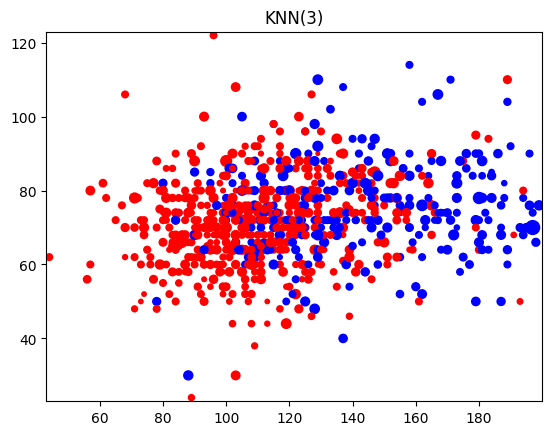

In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib.colors import ListedColormap


X = Diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies']].values
y = Diabetes['Outcome'].values

# y_pred = knn.predict(X_test)
# accuracy = (y_pred == y_test.ravel()).mean()
# print(accuracy)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h=.02


for weights in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train.ravel())
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(X_test)
    
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN(3)")
plt.show()
    
    

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

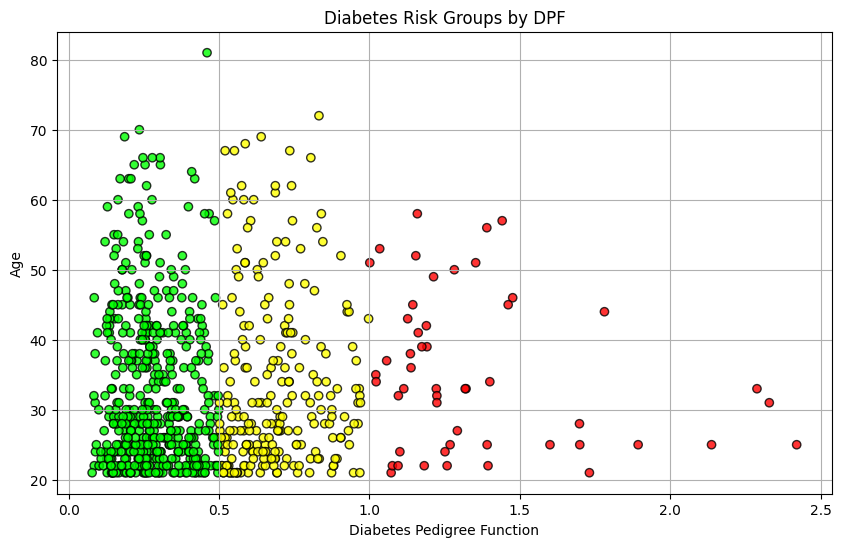

In [11]:
dpf = Diabetes['DiabetesPedigreeFunction'].values
age = Diabetes['Age'].values  

risk_group = np.where(dpf < 0.5, 'Low', np.where(dpf < 1.0, 'Medium', 'High'))

colors = {'Low': '#00FF00', 'Medium': '#FFFF00', 'High': '#FF0000'}
color_map = [colors[risk] for risk in risk_group]

plt.figure(figsize=(10, 6))
plt.scatter(dpf, age, c=color_map, edgecolor='k', alpha=0.8)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Age')
plt.title('Diabetes Risk Groups by DPF')
plt.grid(True)
plt.colorbar(plt.cm.ScalarMappable(cmap=ListedColormap(colors.values())), 
             label='Risk Groups', ticks=[0.33, 0.66, 1.0])

for group, color in colors.items():
    plt.scatter([], [], color=color, label=f'{group} Risk')
plt.legend()
plt.show()

In [ ]:
# Classification by pedigree
# 0 <= LO < 0.333
# 333 <= MED <= 0.666
# 0.666 < HI <= 1 

RiskGroup
2    277
3    276
1    215
Name: count, dtype: int64


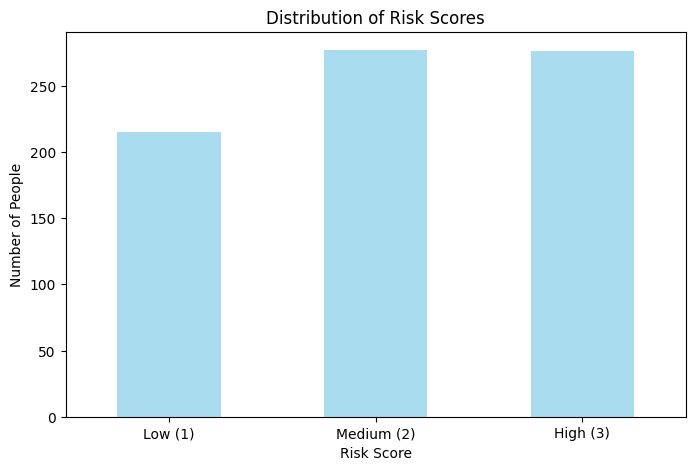

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def categorize_risk(row, means):
    score = sum(row[feature] > mean for feature, mean in means.items())
    if score <= 2:
        return 1
    if score <= 4:
        return 2
    ## Group 3 accuracy increases as its min score threshold increases
    else:
        return 3

Diabetes['RiskGroup'] = Diabetes.apply(categorize_risk, means=means, axis=1)

print(Diabetes['RiskGroup'].value_counts())
plt.figure(figsize=(8, 5))
Diabetes['RiskGroup'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1, 2], labels=['Low (1)', 'Medium (2)', 'High (3)'], rotation=0)
plt.show()

# What is the relationship between BMI and insulin when predicting diabetes risk?

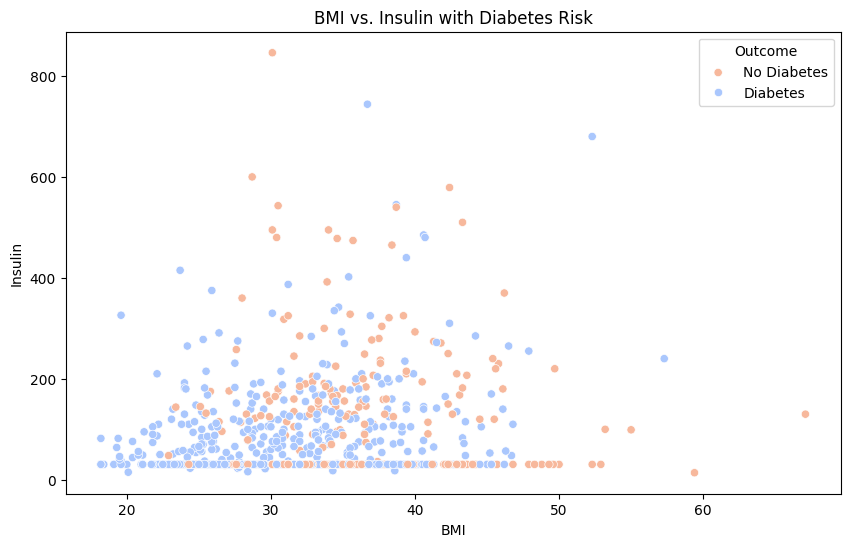

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Diabetes['BMI'] = Diabetes['BMI'].replace(0, Diabetes['BMI'].median())
Diabetes['Insulin'] = Diabetes['Insulin'].replace(0, Diabetes['Insulin'].median())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Diabetes['BMI'], y=Diabetes['Insulin'], hue=Diabetes['Outcome'], palette='coolwarm')
plt.title("BMI vs. Insulin with Diabetes Risk")
plt.xlabel("BMI")
plt.ylabel("Insulin")
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()


In [ ]:
correlation = Diabetes['BMI'].corr(Diabetes['Insulin'])
print(f"Pearson Correlation between BMI and Insulin: {correlation:.2f}")


Pearson Correlation between BMI and Insulin: 0.19


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = Diabetes[['BMI', 'Insulin']]
y = Diabetes['Outcome']

X['BMI'] = X['BMI'].replace(0, X['BMI'].median())
X['Insulin'] = X['Insulin'].replace(0, X['Insulin'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.87      0.77       151
           1       0.52      0.28      0.36        80

    accuracy                           0.66       231
   macro avg       0.61      0.57      0.57       231
weighted avg       0.63      0.66      0.63       231



C:\Users\woody\AppData\Local\Temp\ipykernel_1840\3085782424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI'] = X['BMI'].replace(0, X['BMI'].median())
C:\Users\woody\AppData\Local\Temp\ipykernel_1840\3085782424.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Insulin'] = X['Insulin'].replace(0, X['Insulin'].median())


# How are age and pregnancies related to diabetes risk?

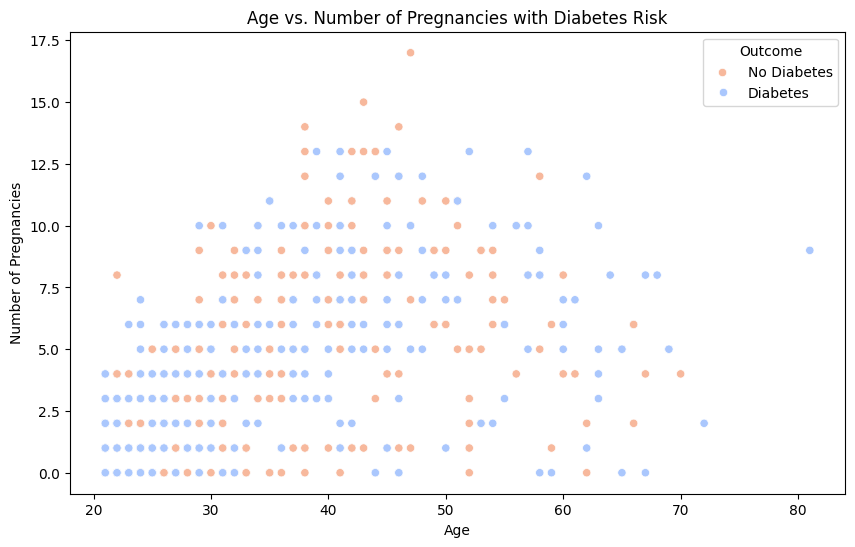

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Diabetes['Age'], y=Diabetes['Pregnancies'], hue=Diabetes['Outcome'], palette='coolwarm')
plt.title("Age vs. Number of Pregnancies with Diabetes Risk")
plt.xlabel("Age")
plt.ylabel("Number of Pregnancies")
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()


In [ ]:
correlation = Diabetes['Age'].corr(Diabetes['Pregnancies'])
print(f"Pearson Correlation between Age and Number of Pregnancies: {correlation:.2f}")


Pearson Correlation between Age and Number of Pregnancies: 0.54


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = Diabetes[['Age', 'Pregnancies']]
y = Diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.85      0.76       151
           1       0.49      0.26      0.34        80

    accuracy                           0.65       231
   macro avg       0.59      0.56      0.55       231
weighted avg       0.62      0.65      0.62       231



# How does the performance of different predictive models compare: Logistic regression vs decision trie vs neural network?

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

def cv(X_train, y_train):
    names = [
        'LogisticRegression',
        'KNN',
        'SVM',
        'Decision Trie',
        'Random Forest',
        'Neural Network'
    ]
    
    classifiers = [
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(max_depth=4),
        MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500, random_state=42)
    ]
    res = {}
    for name, clf in zip(names, classifiers):
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        res[name] = scores
    for name, scores in res.items():
        print("%20s | accuracy %0.3f%% (+/- %0.2f%%)" % (name, 100 * scores.mean(), 100 * scores.std() * 2))
    

cv(X_train, y_train)

  LogisticRegression | accuracy 76.064% (+/- 5.21%)
                 KNN | accuracy 71.498% (+/- 5.15%)
                 SVM | accuracy 74.268% (+/- 3.91%)
       Decision Trie | accuracy 67.260% (+/- 5.48%)
       Random Forest | accuracy 75.895% (+/- 2.23%)
      Neural Network | accuracy 69.378% (+/- 4.53%)


Accuracy: 74.03%


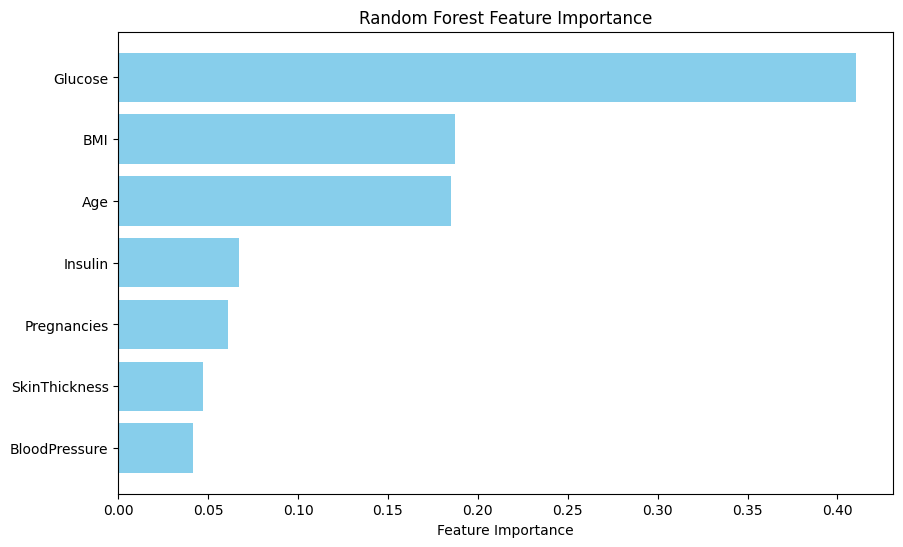

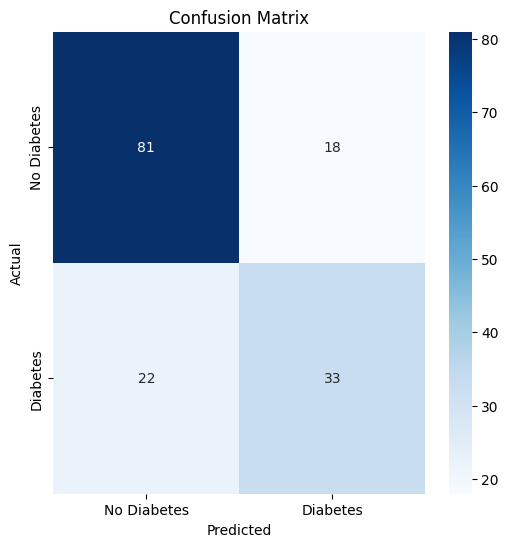

In [ ]:
X = Diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies']]
y = Diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

features = X.columns
importances = rf.feature_importances_

sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


> Logistic Regression will be easier to interpret but lacks the ability to explain non-linear relationships. The model may overfit.

> Random Forest Classification can capture complex relationships but I do not fully understand hyperparameters.

# Insulin is recorded in only half of the observations. Is there a correlation between the people who are tested vs not tested?

In [ ]:
not_recorded = Diabetes[Diabetes['Insulin'] == 0]
recorded = Diabetes[Diabetes['Insulin'] != 1]

recorded

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RiskGroup
0,6,148,72,35,0,33.6,0.627,50,1,3
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,3
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,3
764,2,122,70,27,0,36.8,0.340,27,0,2
765,5,121,72,23,112,26.2,0.245,30,0,3
766,1,126,60,0,0,30.1,0.349,47,1,1


In [ ]:
missing_insulin = Diabetes['Insulin'] == 0

Diabetes['Insulin_Test'] = missing_insulin.astype(int)

continuous_columns = ['Age', 'BMI', 'Pregnancies']
for col in continuous_columns:
    print(f"Correlation between {col} and Insulin Test:")
    print(Diabetes[[col, 'Insulin_Test']].corr())

categorical_columns = ['Outcome']
for col in categorical_columns:
    print(f"Chi-square test between {col} and Insulin Test:")
    contingency_table = pd.crosstab(Diabetes[col], Diabetes['Insulin_Test'])
    print(contingency_table)
    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test p-value: {p}")
    
    # Chi > 0.05 indicating the absence of insulin isn't significantly related to the outcome


Correlation between Age and Insulin Test:
                   Age  Insulin_Test
Age           1.000000      0.211885
Insulin_Test  0.211885      1.000000
Correlation between BMI and Insulin Test:
                   BMI  Insulin_Test
BMI           1.000000     -0.129748
Insulin_Test -0.129748      1.000000
Correlation between Pregnancies and Insulin Test:
              Pregnancies  Insulin_Test
Pregnancies      1.000000      0.170156
Insulin_Test     0.170156      1.000000
Chi-square test between Outcome and Insulin Test:
Insulin_Test    0    1
Outcome               
0             264  236
1             130  138
Chi-square test p-value: 0.28975431574224064


# What is the most important factor in predecting whether someone is diabetic?

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

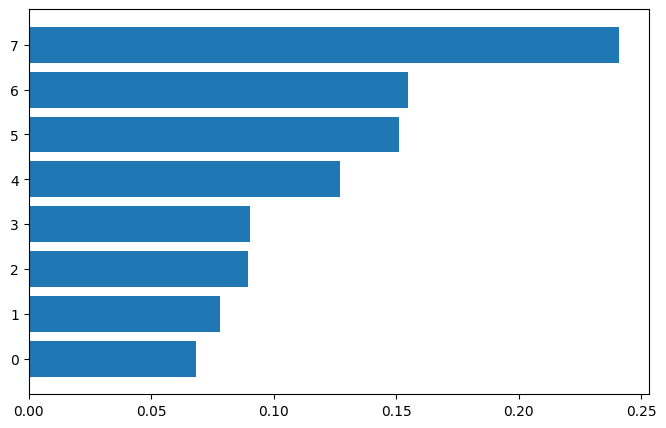

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
factor = model.feature_importances_
indices = np.argsort(factor)
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), factor[indices])
plt.yticks(range(len(indices)), X_train.columns[indices])



In [ ]:
def predict_diabetes(bmi, insulin, age, glucose, blood_pressure, skin_thickness, pregnancies):
    input_data = [[glucose, blood_pressure, skin_thickness, insulin, bmi, age, pregnancies]]
    
    prediction = rf.predict(input_data)
    
    if prediction[0] == 0:
        return "No Diabetes"
    else:
        return "Diabetes"

bmi = 55.0
insulin = 120.0
age = 45
glucose = 130.0
blood_pressure = 80
skin_thickness = 20
pregnancies = 3

outcome = predict_diabetes(bmi, insulin, age, glucose, blood_pressure, skin_thickness, pregnancies)
print(f"The predicted outcome for the person is: {outcome}")


The predicted outcome for the person is: Diabetes


c:\Users\woody\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
